# 03 — Theme Physics Lab

In this notebook, I treat **UI themes** as **physics profiles**, not just color schemes.

Each theme (Desert / Water / Neon) has:

- `inertia` — how strong the initial flick feels
- `damping` — how quickly motion dies out
- `wobble_amplitude` — how much oscillation or "wobble" we see over time

I simulate a 1D motion (like flicking a panel) and show how each theme produces
a different motion curve for:

- position over time
- velocity over time


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)

# Theme physics profiles — tweakable
THEMES = {
    "Desert": {
        "inertia": 0.9,
        "damping": 0.85,
        "wobble_amplitude": 0.4,
    },
    "Water": {
        "inertia": 1.1,
        "damping": 0.95,
        "wobble_amplitude": 0.7,
    },
    "Neon": {
        "inertia": 1.2,
        "damping": 0.90,
        "wobble_amplitude": 1.0,
    },
}

THEMES


{'Desert': {'inertia': 0.9, 'damping': 0.85, 'wobble_amplitude': 0.4},
 'Water': {'inertia': 1.1, 'damping': 0.95, 'wobble_amplitude': 0.7},
 'Neon': {'inertia': 1.2, 'damping': 0.9, 'wobble_amplitude': 1.0}}

In [2]:
def simulate_motion(theme_name: str, steps: int = 80, base_impulse: float = 1.0) -> pd.DataFrame:
    """
    Simulate 1D motion for a theme:

    - v = velocity
    - x = position

    Update:
      v_t+1 = v_t * damping + wobble
      x_t+1 = x_t + v_t+1
    """
    params = THEMES[theme_name]
    inertia = params["inertia"]
    damping = params["damping"]
    wobble_amp = params["wobble_amplitude"]

    v = base_impulse * inertia
    x = 0.0

    xs = []
    vs = []

    for t in range(steps):
        wobble = wobble_amp * np.sin(t / 6.0)
        v = v * damping + wobble * 0.02
        x += v

        xs.append(x)
        vs.append(v)

    return pd.DataFrame(
        {
            "t": np.arange(steps),
            "x": xs,
            "v": vs,
            "theme": theme_name,
        }
    )


In [3]:
steps = 80
base_impulse = 1.0

dfs = []
for name in THEMES.keys():
    sim_df = simulate_motion(name, steps=steps, base_impulse=base_impulse)
    dfs.append(sim_df)

motion_df = pd.concat(dfs, ignore_index=True)

print("Rows:", len(motion_df))
motion_df.head()


Rows: 240


,t,x,v,theme
0,0,0.765000,0.765000,Desert
1,1,1.416577,0.651577,Desert
2,2,1.973035,0.556458,Desert
3,3,2.449860,0.476825,Desert
4,4,2.860108,0.410248,Desert


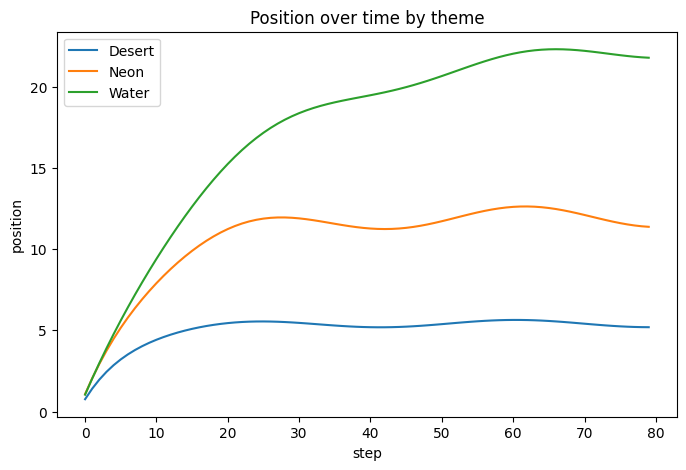

In [4]:
fig, ax = plt.subplots()

for theme_name, group in motion_df.groupby("theme"):
    ax.plot(group["t"], group["x"], label=theme_name)

ax.set_title("Position over time by theme")
ax.set_xlabel("step")
ax.set_ylabel("position")
ax.legend()
plt.show()


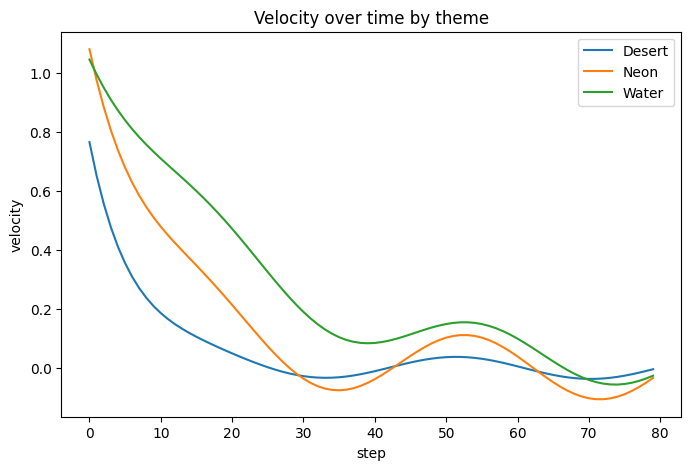

In [5]:
fig, ax = plt.subplots()

for theme_name, group in motion_df.groupby("theme"):
    ax.plot(group["t"], group["v"], label=theme_name)

ax.set_title("Velocity over time by theme")
ax.set_xlabel("step")
ax.set_ylabel("velocity")
ax.legend()
plt.show()


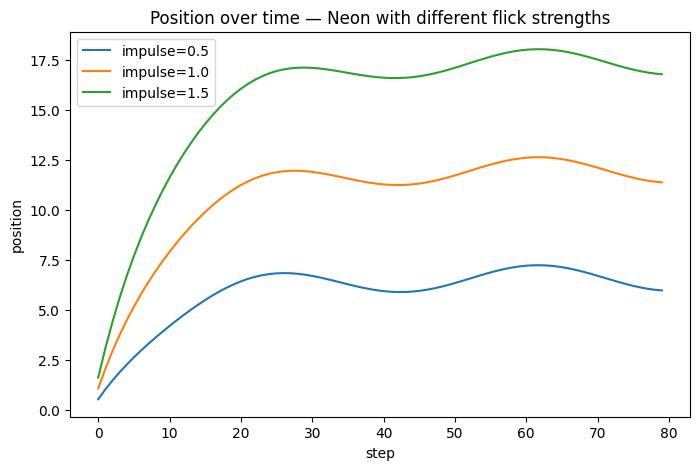

In [6]:
impulses = [0.5, 1.0, 1.5]
theme_to_inspect = "Neon"

dfs = []
for imp in impulses:
    sim_df = simulate_motion(theme_to_inspect, steps=steps, base_impulse=imp)
    sim_df["impulse"] = imp
    dfs.append(sim_df)

imp_df = pd.concat(dfs, ignore_index=True)

fig, ax = plt.subplots()
for imp, group in imp_df.groupby("impulse"):
    ax.plot(group["t"], group["x"], label=f"impulse={imp}")

ax.set_title(f"Position over time — {theme_to_inspect} with different flick strengths")
ax.set_xlabel("step")
ax.set_ylabel("position")
ax.legend()
plt.show()


## Summary

In this Theme Physics Lab, I treated each theme as a **motion profile**:

- **Desert**: heavier, slower; motion dies out faster (lower inertia, stronger damping)
- **Water**: smoother, more fluid oscillation (higher damping, more wobble)
- **Neon**: snappier, more energetic motion (higher inertia, stronger wobble)

These curves will later be wired into the **Dimensional UI Hypercube** engine so that:

- The same drag gesture can "feel" different depending on the active theme
- Themes control *how* the interface moves, not just *how it looks*
